<a href="https://colab.research.google.com/github/msruan/tec_2025.1/blob/main/tbfinal_arvores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalando repositório de datasets

In [ ]:
pip install ucimlrepo

## Identificadores dos Respositorios

In [ ]:
IRIS_DATASET_ID_UCIREPO = 53

BREAST_CANCER_DATASET_ID_UCIREPO = 17

## Funções Auxiliares

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

def prepare_raw_dataset(df, target_column="class"):
  x_prepared = df.drop(columns=[target_column], errors="ignore")
  y_prepared = df[target_column]
  return x_prepared, y_prepared

def run_validation(modelo, X_test, y_test, nome_classes=None):
    print("--- VALIDAÇÃO DO MODELO ---")
    y_pred = modelo.predict(X_test)

    print("\n * Relatório de Classificação:\n")
    print(classification_report(y_test, y_pred, target_names=nome_classes))

    acc = accuracy_score(y_test, y_pred)
    print("-----------------------------------------")
    print(f"* Acurácia Global: {acc:.4f} ({acc:.2%})")
    print("-----------------------------------------")

    print(" * Matriz de Confusão:")
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=nome_classes if len(nome_classes) else modelo.classes_,
                yticklabels=nome_classes if len(nome_classes) else modelo.classes_)
    plt.title('Matriz de Confusão')
    plt.ylabel('Verdadeiro (Real)')
    plt.xlabel('Previsto (Modelo)')
    plt.show()

In [ ]:
from ucimlrepo import fetch_ucirepo

def fetch_dataset_for_decision_tree(id = IRIS_DATASET_ID) -> tuple:
  dataset = fetch_ucirepo(id=id)

  # data (as pandas dataframes)
  x = dataset.data.features
  y = dataset.data.targets

  return x, y, dataset.data.original, dataset.data.targets

# Árvores de Decisão
Explorando árvores de decisão dos datasets de câncer de mama e iris.


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn import tree

def run_decision_tree(x, y, data, target_column="class"):
  # Criar DataFrame
  df = pd.DataFrame(data)

  x, y = prepare_raw_dataset(df, target_column)

  # Separar entre dados de validacao e teste
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=80)

  # Criar e treinar o classificador com entropia
  modelo = DecisionTreeClassifier(criterion='entropy', random_state=42)
  modelo.fit(x_train, y_train)


  # Exibindo as regras da árvore de decisão
  regras = export_text(modelo, feature_names=x.columns.tolist())
  print(regras)

  # Plotar a árvore de decisão
  plt.figure(figsize=(14,8))
  tree.plot_tree(
    modelo,
    feature_names=x.columns,
    class_names=[str(c) for c in y.unique()],
    filled=True,
    rounded=True
  )
  plt.title("Árvore de Decisão (baseada em Entropia - ID3)")
  plt.show()

  run_validation(modelo, x_test, y_test, nome_classes=y.unique())

  df.head()

## Base de dados: *IRIS DATASET*

|--- petal length <= 2.45
|   |--- class: Iris-setosa
|--- petal length >  2.45
|   |--- petal width <= 1.75
|   |   |--- petal length <= 4.95
|   |   |   |--- petal width <= 1.65
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- petal width >  1.65
|   |   |   |   |--- class: Iris-virginica
|   |   |--- petal length >  4.95
|   |   |   |--- petal width <= 1.65
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- petal width >  1.65
|   |   |   |   |--- class: Iris-versicolor
|   |--- petal width >  1.75
|   |   |--- petal length <= 4.85
|   |   |   |--- sepal width <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- sepal width >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- petal length >  4.85
|   |   |   |--- class: Iris-virginica



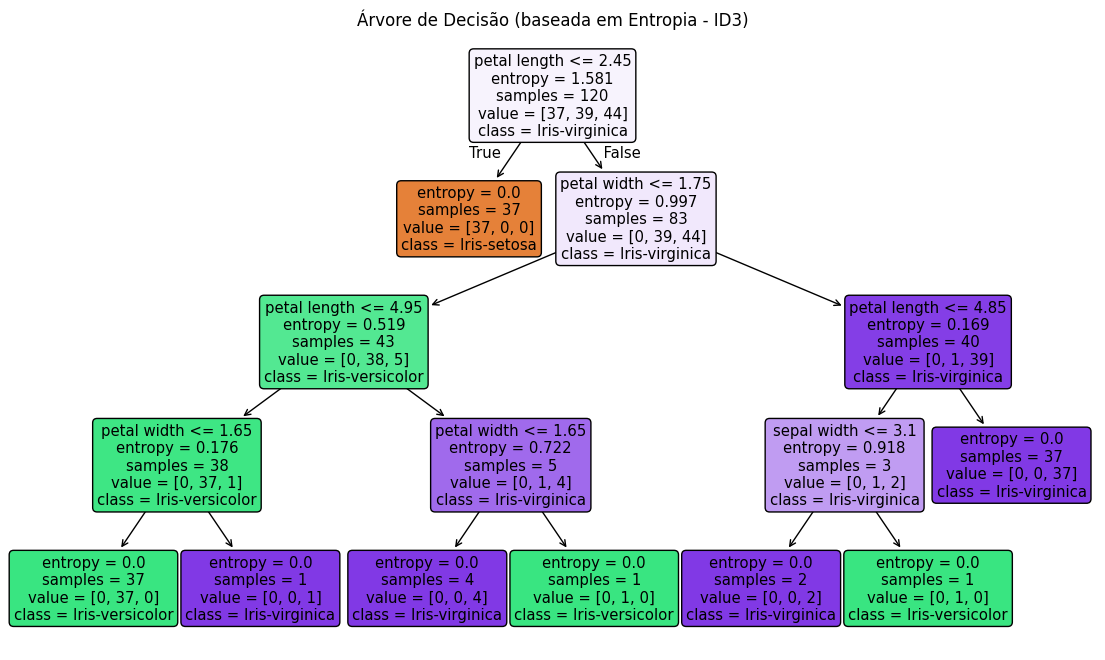

--- VALIDAÇÃO DO MODELO ---

 * Relatório de Classificação:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

-----------------------------------------
* Acurácia Global: 0.9667 (96.67%)
-----------------------------------------
 * Matriz de Confusão:


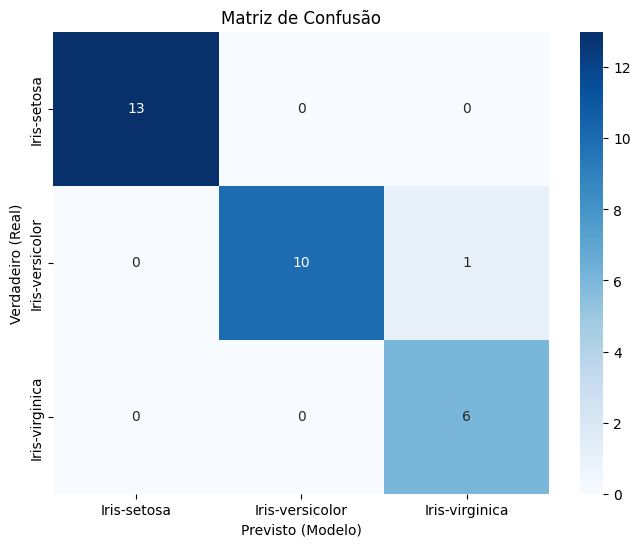

In [ ]:
x, y, data, _ = fetch_dataset_for_decision_tree(IRIS_DATASET_ID_UCIREPO)
run_decision_tree(x, y, data)

## Base de dados: *BREAST* CANCER

|--- concave_points3 <= 0.14
|   |--- area3 <= 957.45
|   |   |--- area3 <= 653.45
|   |   |   |--- class: B
|   |   |--- area3 >  653.45
|   |   |   |--- texture1 <= 21.10
|   |   |   |   |--- fractal_dimension3 <= 0.10
|   |   |   |   |   |--- class: B
|   |   |   |   |--- fractal_dimension3 >  0.10
|   |   |   |   |   |--- fractal_dimension3 <= 0.11
|   |   |   |   |   |   |--- class: M
|   |   |   |   |   |--- fractal_dimension3 >  0.11
|   |   |   |   |   |   |--- class: B
|   |   |   |--- texture1 >  21.10
|   |   |   |   |--- smoothness1 <= 0.09
|   |   |   |   |   |--- smoothness2 <= 0.01
|   |   |   |   |   |   |--- class: B
|   |   |   |   |   |--- smoothness2 >  0.01
|   |   |   |   |   |   |--- class: M
|   |   |   |   |--- smoothness1 >  0.09
|   |   |   |   |   |--- class: M
|   |--- area3 >  957.45
|   |   |--- concavity3 <= 0.19
|   |   |   |--- class: B
|   |   |--- concavity3 >  0.19
|   |   |   |--- class: M
|--- concave_points3 >  0.14
|   |--- perimeter3 <= 112.80


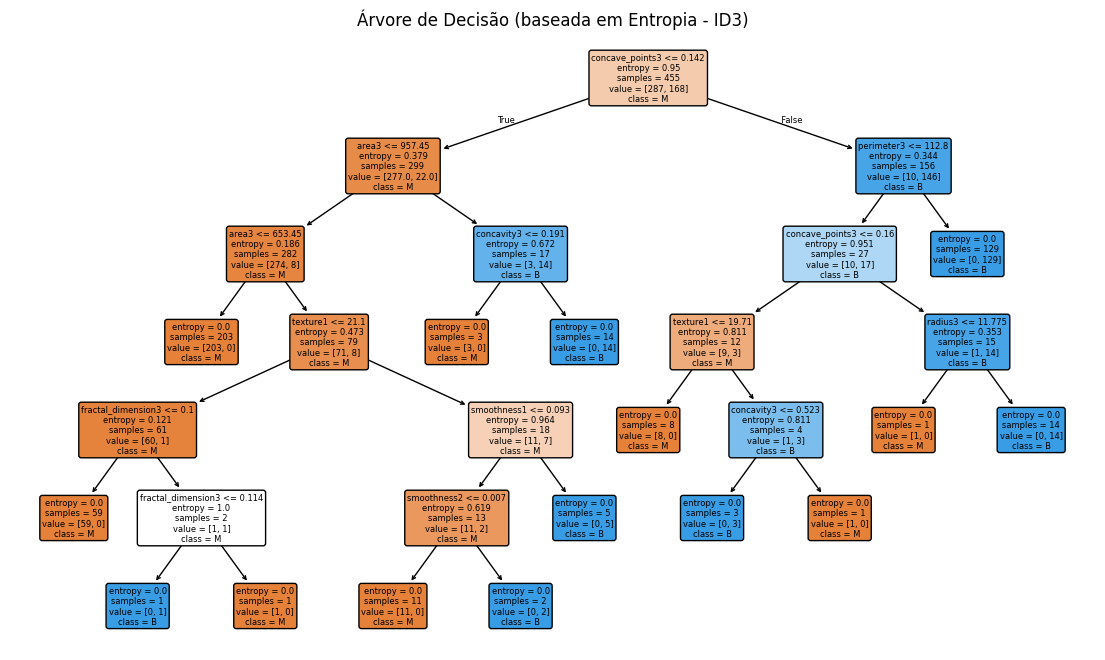

--- VALIDAÇÃO DO MODELO ---

 * Relatório de Classificação:

              precision    recall  f1-score   support

           M       0.92      0.96      0.94        70
           B       0.93      0.86      0.89        44

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114

-----------------------------------------
* Acurácia Global: 0.9211 (92.11%)
-----------------------------------------
 * Matriz de Confusão:


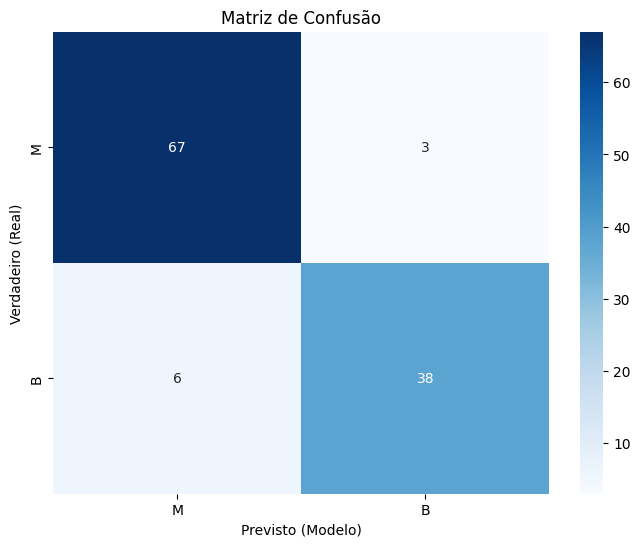

In [ ]:
x, y, original, targets = fetch_dataset_for_decision_tree(BREAST_CANCER_DATASET_ID)
run_decision_tree(x, y, original, target_column="Diagnosis")

# Naive Bayes
Agora vamos utilizar para as mesmas bases de dados o algoritmo NaiveBayes

## Iris Dataset



--- VALIDAÇÃO DO MODELO ---

 * Relatório de Classificação:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

-----------------------------------------
* Acurácia Global: 1.0000 (100.00%)
-----------------------------------------
 * Matriz de Confusão:


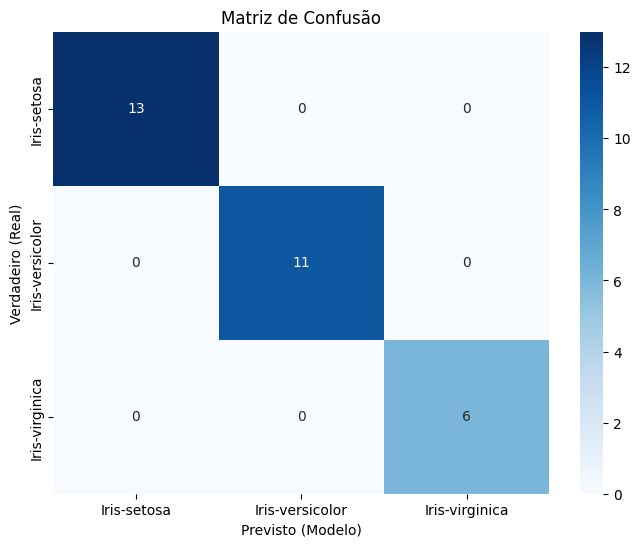

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

x, y, original, _ = fetch_dataset_for_decision_tree(IRIS_DATASET_ID_UCIREPO)

x_prepared, y_prepared = prepare_raw_dataset(original, target_column="class")
x_train, x_test, y_train, y_test = train_test_split(x_prepared, y_prepared, test_size=0.2, random_state=80)

modelo = GaussianNB()
modelo.fit(x_train, y_train)
run_validation(modelo, x_test, y_test, nome_classes=y_prepared.unique())

## Breast Cancer

--- VALIDAÇÃO DO MODELO ---

 * Relatório de Classificação:

              precision    recall  f1-score   support

           M       0.61      0.97      0.75        70
           B       0.00      0.00      0.00        44

    accuracy                           0.60       114
   macro avg       0.30      0.49      0.37       114
weighted avg       0.37      0.60      0.46       114

-----------------------------------------
* Acurácia Global: 0.5965 (59.65%)
-----------------------------------------
 * Matriz de Confusão:


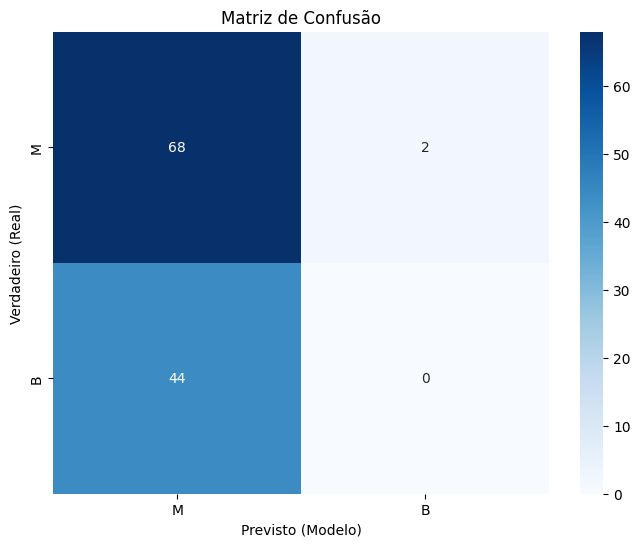

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

x, y, original, _ = fetch_dataset(BREAST_CANCER_DATASET_ID)

x_prepared, y_prepared = prepare_raw_dataset(original, target_column="Diagnosis")
x_train, x_test, y_train, y_test = train_test_split(x_prepared, y_prepared, test_size=0.2, random_state=80)

modelo = GaussianNB()
modelo.fit(x_train, y_train)
run_validation(modelo, x_test, y_test, nome_classes=y_prepared.unique())

# K-Nearest Neighbors
Por fim, o algorimot KNN será aplicado às bases de dados

## Iris Dataset



/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



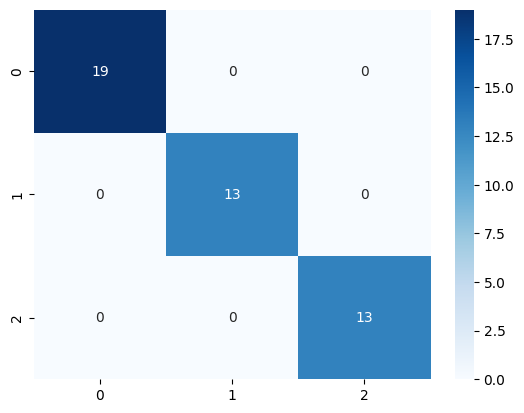

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

x, y, original, _ = fetch_dataset(IRIS_DATASET_ID)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.show()


## Breast Cancer

--- VALIDAÇÃO DO MODELO ---

 * Relatório de Classificação:

              precision    recall  f1-score   support

           M       0.61      0.97      0.75        70
           B       0.00      0.00      0.00        44

    accuracy                           0.60       114
   macro avg       0.30      0.49      0.37       114
weighted avg       0.37      0.60      0.46       114

-----------------------------------------
* Acurácia Global: 0.5965 (59.65%)
-----------------------------------------
 * Matriz de Confusão:


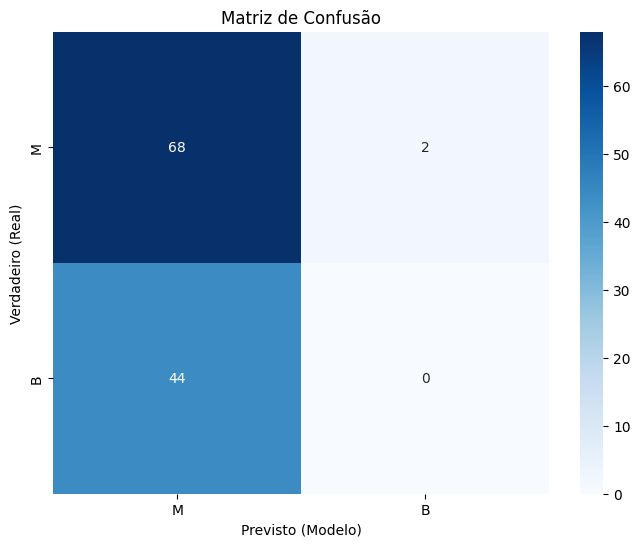

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

x, y, original, _ = fetch_dataset(BREAST_CANCER_DATASET_ID)

x_prepared, y_prepared = prepare_raw_dataset(original, target_column="Diagnosis")
x_train, x_test, y_train, y_test = train_test_split(x_prepared, y_prepared, test_size=0.2, random_state=80)

modelo = GaussianNB()
modelo.fit(x_train, y_train)
run_validation(modelo, x_test, y_test, nome_classes=y_prepared.unique())